Checking if the dataset contains null values / address that is out of Singapore / Suspicious Naming

In [1]:
import pandas as pd

df = pd.read_csv('data/dataset v1.csv') 

# Show count of missing values per column
missing_values = df.isnull().sum()
print("Missing values per column:",missing_values)
print(missing_values[missing_values > 0])

# Show rows missing lat/lon — often needed for geospatial analysis
missing_coords = df[df[['latitude', 'longitude']].isnull().any(axis=1)]
print(f"\nRows with missing latitude or longitude: {len(missing_coords)}")

# Singapore generally falls within:
# Latitude: 1.22 to 1.47
# Longitude: 103.6 to 104.0

# Filter rows with coordinates outside Singapore
outside_sg = df[
    (df['latitude'] < 1.22) | (df['latitude'] > 1.47) |
    (df['longitude'] < 103.6) | (df['longitude'] > 104.0)
]

print(f"\nEntries with coordinates outside Singapore: {len(outside_sg)}")

# show street names that are suspiciously short or strange
weird_streets = df[df['street_name'].str.len() < 3]

# Return result
if not weird_streets.empty:
    print(weird_streets[['block', 'street_name']])
else:
    print("There is no weird street names.")

Missing values per column: Unnamed: 0                  0
month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
remaining_lease             0
resale_price                0
latitude                    0
longitude                   0
nearest_bus_stop            0
dist_bus_stop_m             0
nearest_pei                 0
dist_pei_m                  0
nearest_jc                  0
dist_jc_m                   0
nearest_kindergarten        0
dist_kindergarten_m         0
nearest_primary_school      0
dist_primary_school_m       0
nearest_secondary_school    0
dist_secondary_school_m     0
nearest_poly                0
dist_poly_m                 0
nearest_library             0
dist_library_m              0
nearest_mall                0
dist_mall_m                 0
nearest_hospi

Plotting a line plot to see the trend of resale market of the 5 most transacted town.

In [22]:
# Filtering the Top 5 most transacted towns and flat type

import pandas as pd

df = pd.read_csv('data/dataset v1.csv') 

# top 5 most transacted towns
top_towns = df['town'].value_counts().nlargest(5).index.tolist()

# Get top 5 most transacted flat types
top_flat_types = df['flat_type'].value_counts().nlargest(5).index.tolist()

# Filter dataset
filtered_df = df[
    (df['town'].isin(top_towns)) &
    (df['flat_type'].isin(top_flat_types))
]

print("Top 5 Transacted Towns:", top_towns)
print("Top 5 Transacted Flat Types:", top_flat_types)

Top 5 Transacted Towns: ['SENGKANG', 'PUNGGOL', 'WOODLANDS', 'YISHUN', 'TAMPINES']
Top 5 Transacted Flat Types: ['4 ROOM', '5 ROOM', '3 ROOM', 'EXECUTIVE', '2 ROOM']


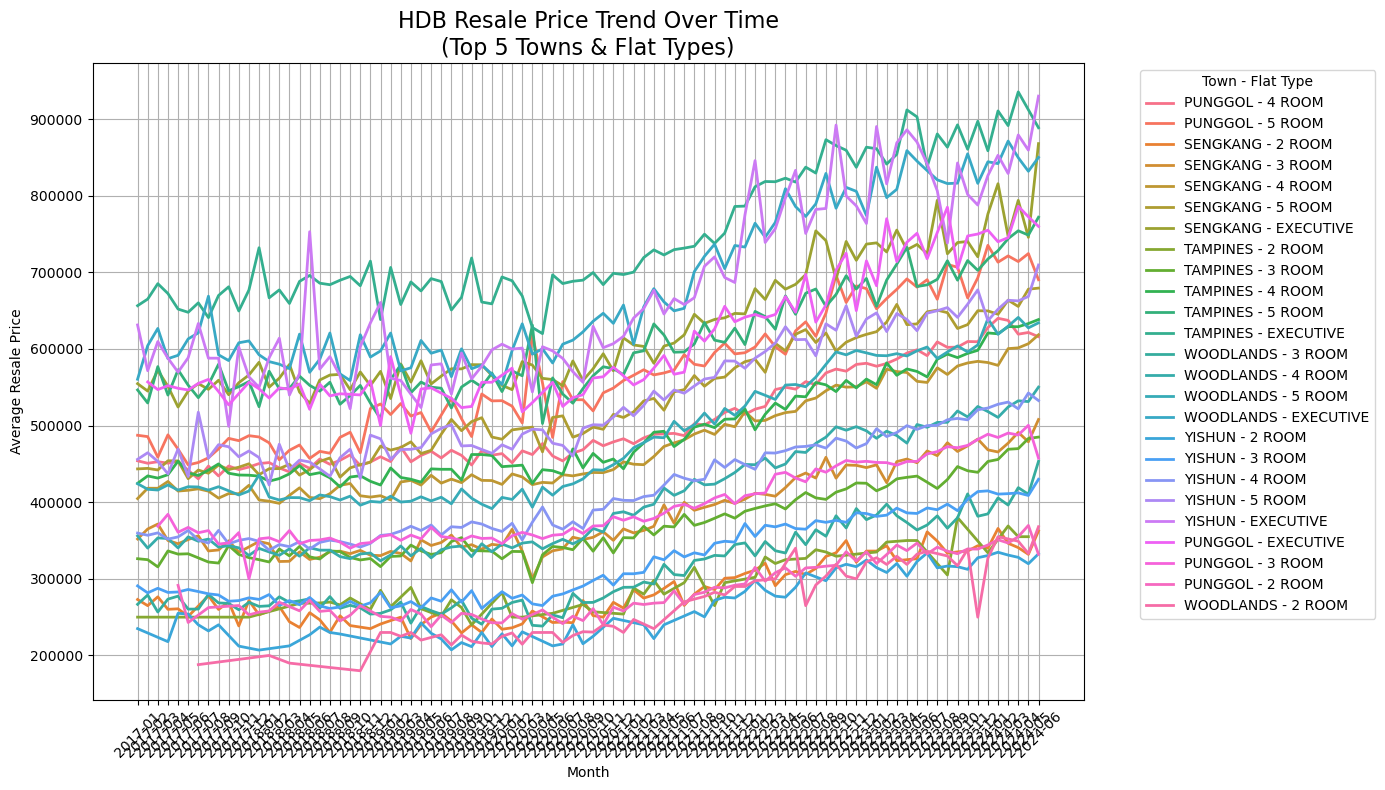

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'month' to datetime
df['month'] = pd.to_datetime(df['month'])

# Group by month, town, flat_type and calculate average resale price
grouped = (
    filtered_df
    .groupby(['month', 'town', 'flat_type'])['resale_price']
    .mean()
    .reset_index()
)

# Create a combined label for grouping
grouped['label'] = grouped['town'] + ' - ' + grouped['flat_type']

# Plot the trend over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped, x='month', y='resale_price', hue='label', linewidth=2)

plt.title('HDB Resale Price Trend Over Time\n(Top 5 Towns & Flat Types)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Resale Price')
plt.xticks(rotation=45)
plt.legend(title='Town - Flat Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

To avoid bias in the result, we will use the least 5 transacted town and flat type for comparison. 

Least 5 Transacted Towns: ['BUKIT TIMAH', 'MARINE PARADE', 'CENTRAL AREA', 'BISHAN', 'SERANGOON']
Least 5 Transacted Flat Types: ['1 ROOM', 'MULTI-GENERATION', '2 ROOM', 'EXECUTIVE', '3 ROOM']


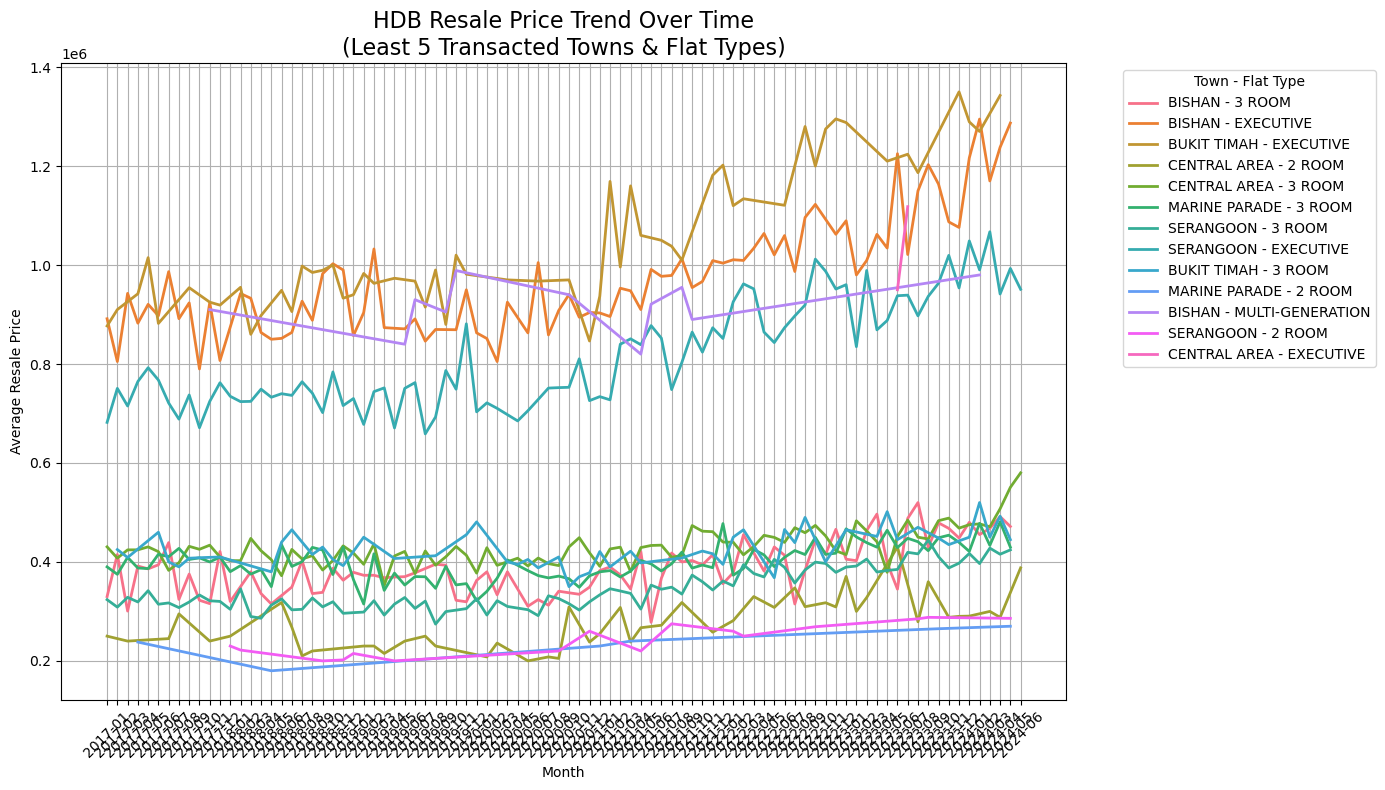

In [23]:
least_towns = df['town'].value_counts().nsmallest(5).index.tolist()
least_flat_types = df['flat_type'].value_counts().nsmallest(5).index.tolist()


least_filtered_df = df[
    (df['town'].isin(least_towns)) &
    (df['flat_type'].isin(least_flat_types))
]

print("Least 5 Transacted Towns:", least_towns)
print("Least 5 Transacted Flat Types:", least_flat_types)

# Group by month, town, flat_type and compute average resale price
grouped = (
    least_filtered_df
    .groupby(['month', 'town', 'flat_type'])['resale_price']
    .mean()
    .reset_index()
)

# Create a combined label
grouped['label'] = grouped['town'] + ' - ' + grouped['flat_type']

# Plot the trend
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped, x='month', y='resale_price', hue='label', linewidth=2)

plt.title('HDB Resale Price Trend Over Time\n(Least 5 Transacted Towns & Flat Types)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Resale Price')
plt.xticks(rotation=45)
plt.legend(title='Town - Flat Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Using Scatter Plot, we want to understand if the distance of the amenities around the area will affect the house pricing.

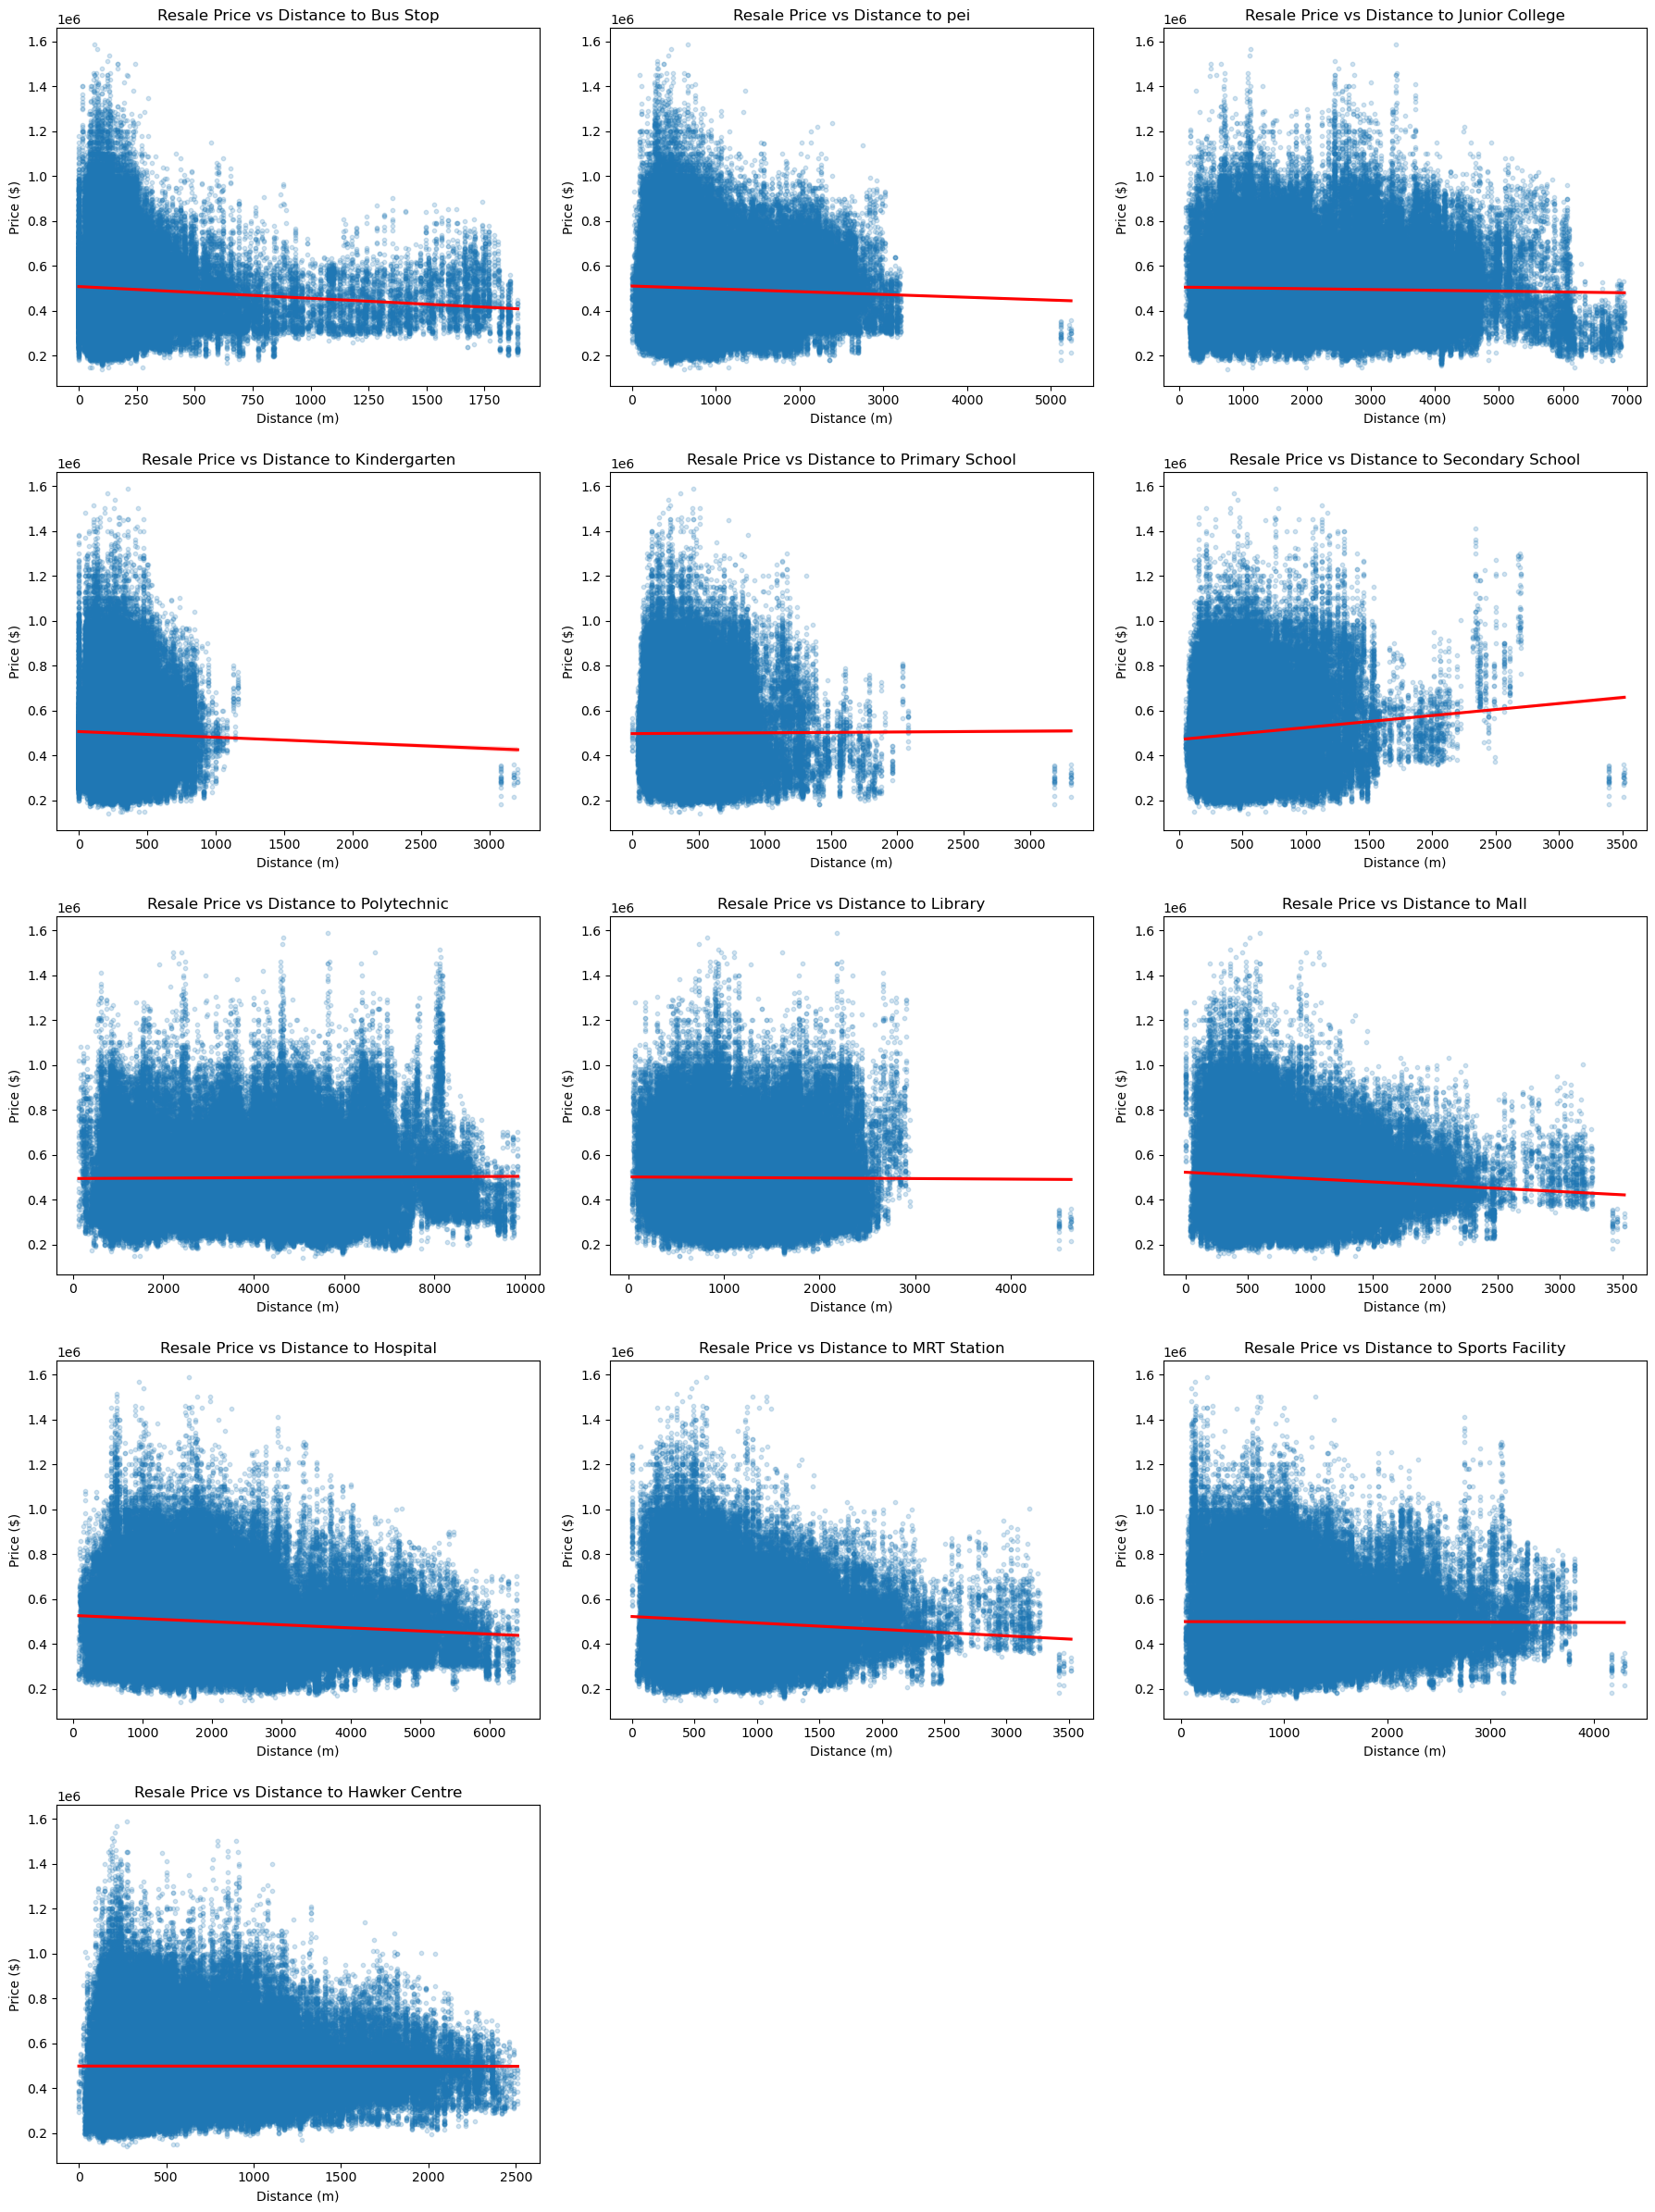

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of amenities and their distance columns
amenity_columns = {
    "Bus Stop": "dist_bus_stop_m",
    "pei": "dist_pei_m",
    "Junior College": "dist_jc_m",
    "Kindergarten": "dist_kindergarten_m",
    "Primary School": "dist_primary_school_m",
    "Secondary School": "dist_secondary_school_m",
    "Polytechnic": "dist_poly_m",
    "Library": "dist_library_m",
    "Mall": "dist_mall_m",
    "Hospital": "dist_hospital_m",
    "MRT Station": "dist_mrt_station_m",
    "Sports Facility": "dist_sports_facility_m",
    "Hawker Centre": "dist_hawker_centre_m",
}

# Plot each one in a grid layout
num_cols = 3
fig, axes = plt.subplots(nrows=len(amenity_columns) // num_cols + 1, ncols=num_cols, figsize=(18, 24))
axes = axes.flatten()

for i, (label, col) in enumerate(amenity_columns.items()):
    sns.regplot(
        data=df,
        x=col,
        y='resale_price',
        ax=axes[i],
        scatter_kws={'alpha': 0.2, 's': 10},
        line_kws={'color': 'red'}
    )
    axes[i].set_title(f'Resale Price vs Distance to {label}')
    axes[i].set_xlabel('Distance (m)')
    axes[i].set_ylabel('Price ($)')

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Based on the above scatter plot,
- A downward trend = closer distance → higher price
- A flat or noisy scatter = little impact
- Outliers = special cases (e.g. luxury flats far from amenities)

Analyze how HDB resale prices vary across towns based on their distance from the most expensive town, using a scatter plot or line plot.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [geopy]
Most Expensive Town: BUKIT MERAH


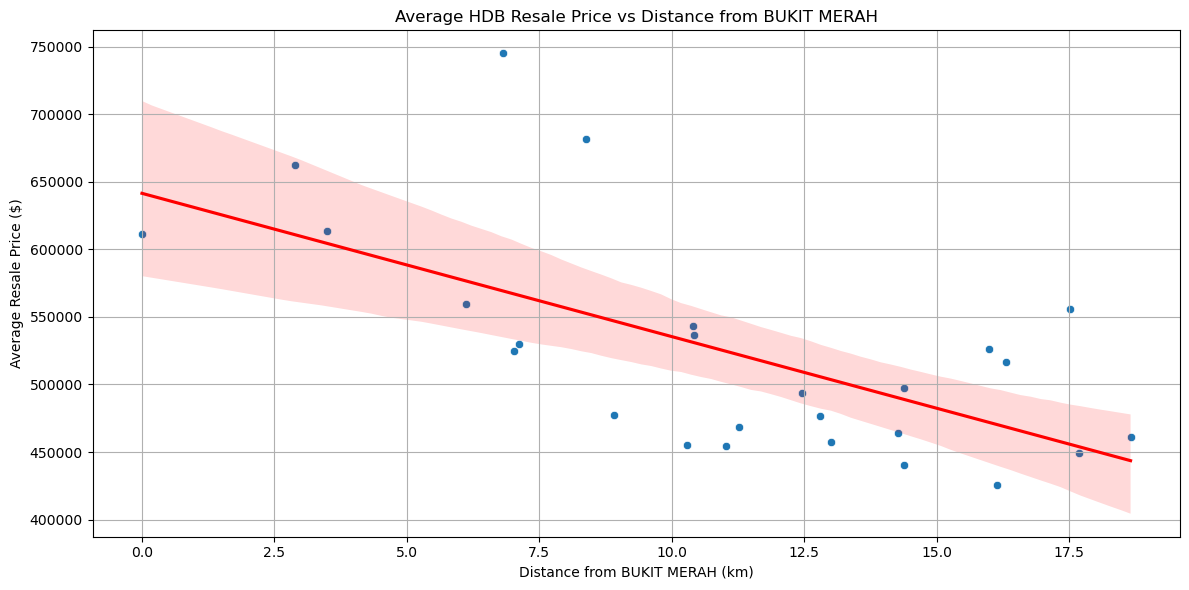

In [13]:
!pip install geopy
from geopy.distance import geodesic


# Load or create town centroids
town_coords = df.groupby('town')[['latitude', 'longitude']].mean().reset_index()

# Find the town with the most expensive flat
most_expensive_flat = df.loc[df['resale_price'].idxmax()]
reference_town = most_expensive_flat['town']

print("Most Expensive Town:", reference_town)

# Get reference town coordinates
ref_coords = town_coords[town_coords['town'] == reference_town][['latitude', 'longitude']].values[0]

# Calculate distance of each town from the reference town
def compute_distance(row):
    town_location = (row['latitude'], row['longitude'])
    return geodesic(ref_coords, town_location).kilometers

town_coords['distance_from_ref'] = town_coords.apply(compute_distance, axis=1)

# Merge average price per town
avg_price_per_town = df.groupby('town')['resale_price'].mean().reset_index()
town_coords = town_coords.merge(avg_price_per_town, on='town')

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=town_coords, x='distance_from_ref', y='resale_price')

# Fit regression line
sns.regplot(data=town_coords, x='distance_from_ref', y='resale_price', scatter=False, color='red')

plt.title(f"Average HDB Resale Price vs Distance from {reference_town}")
plt.xlabel(f"Distance from {reference_town} (km)")
plt.ylabel("Average Resale Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

Notice there is some outliers in the regression line. Identify the outliers data.  

In [15]:
import statsmodels.api as sm

# Fit simple linear regression
X = sm.add_constant(town_coords['distance_from_ref'])
y = town_coords['resale_price']
model = sm.OLS(y, X).fit()

# Predict and calculate residuals
town_coords['predicted_price'] = model.predict(X)
town_coords['residual'] = town_coords['resale_price'] - town_coords['predicted_price']

# Mark as outliers if residual is large (e.g., > 2 std dev from mean)
residual_std = town_coords['residual'].std()
outliers = town_coords[abs(town_coords['residual']) > 2 * residual_std]

print(outliers[['town', 'resale_price', 'distance_from_ref', 'residual']])

          town   resale_price  distance_from_ref       residual
2       BISHAN  681416.053216           8.382631  128831.062170
6  BUKIT TIMAH  745127.175175           6.808840  175847.404247


Understanding the number of flats per town

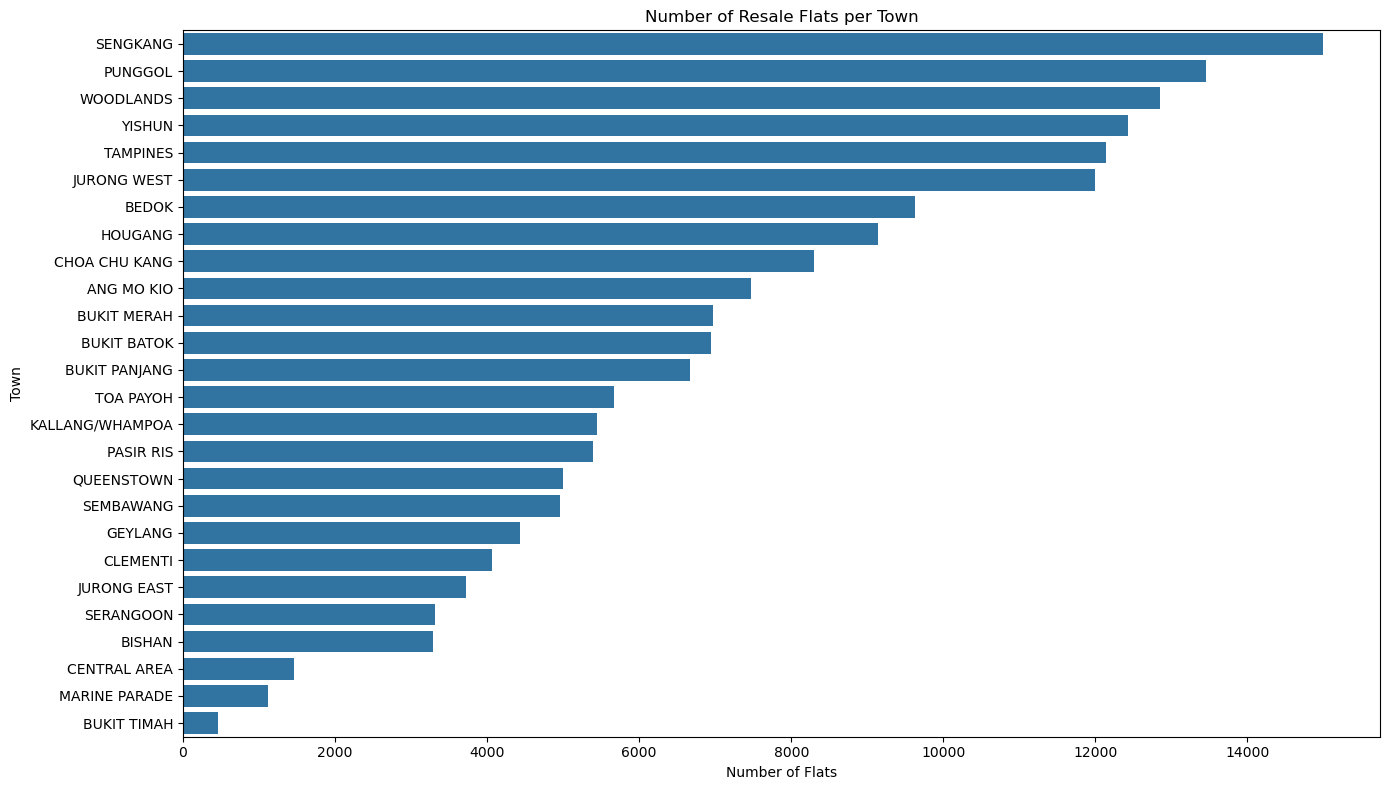

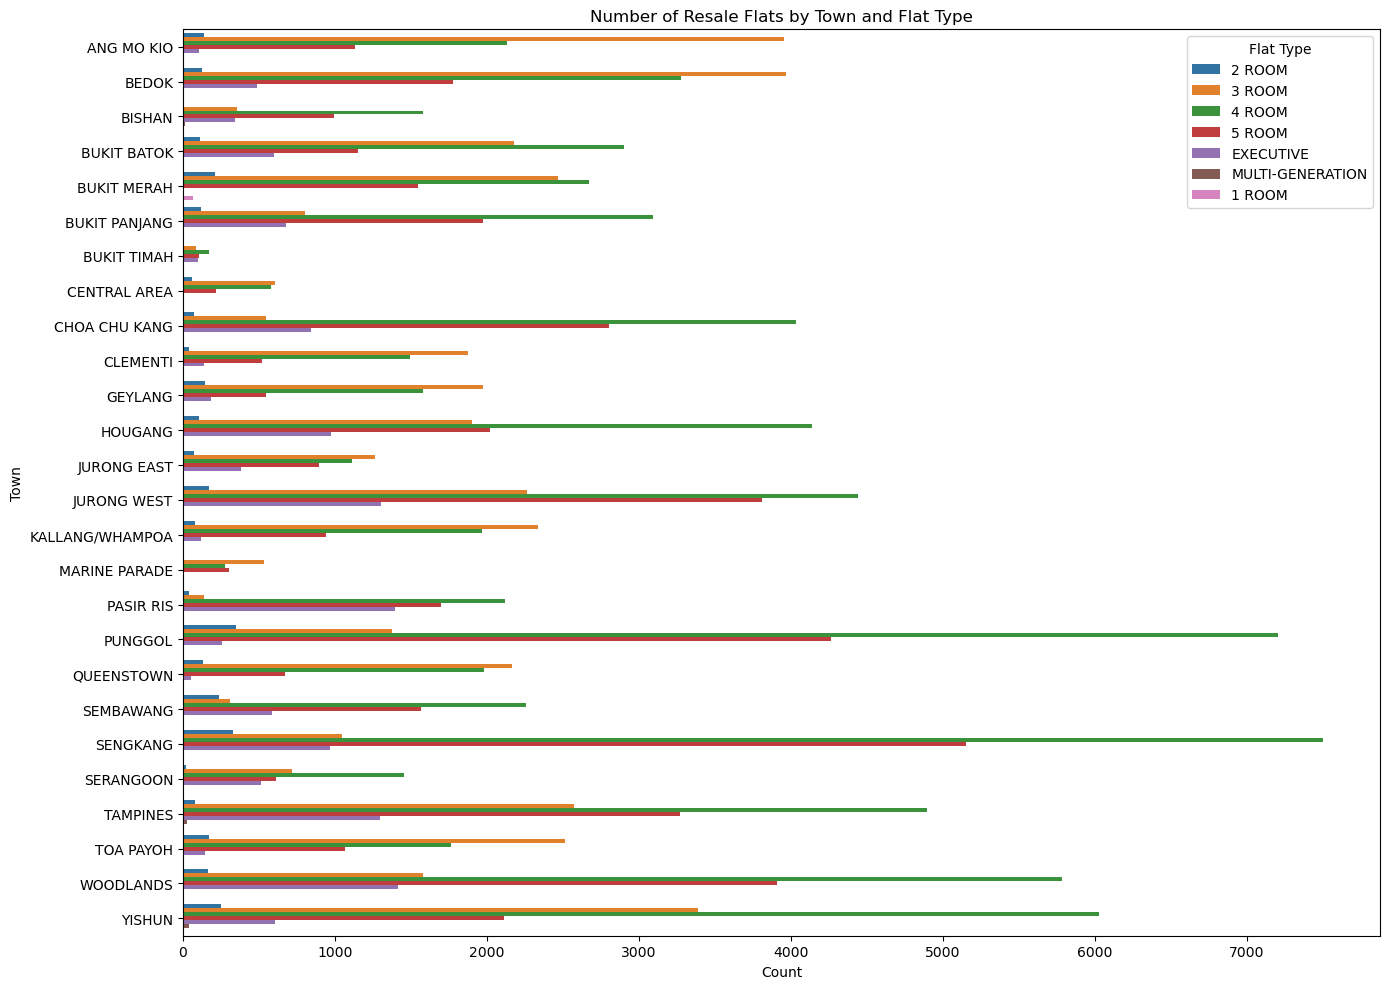

In [17]:
# Count transactions per town
town_counts = df['town'].value_counts().reset_index()
town_counts.columns = ['town', 'num_flats']

# Sort for better visualization
town_counts = town_counts.sort_values(by='num_flats', ascending=False)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=town_counts, x='num_flats', y='town')
plt.title('Number of Resale Flats per Town')
plt.xlabel('Number of Flats')
plt.ylabel('Town')
plt.tight_layout()
plt.show()

grouped = df.groupby(['town', 'flat_type']).size().reset_index(name='count')

plt.figure(figsize=(14, 10))
sns.barplot(data=grouped, x='count', y='town', hue='flat_type')
plt.title('Number of Resale Flats by Town and Flat Type')
plt.xlabel('Count')
plt.ylabel('Town')
plt.legend(title='Flat Type')
plt.tight_layout()
plt.show()

By cross referencing if the number of resale flat price correspond to the Town Area:

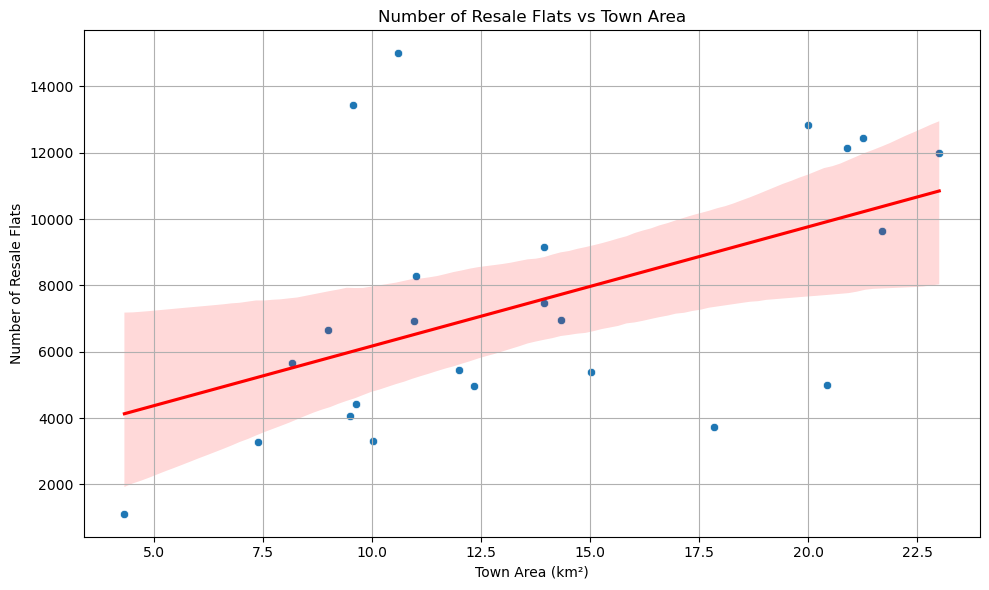

In [24]:
#Counting the number of resale flats

resale_counts = df['town'].value_counts().reset_index()
resale_counts.columns = ['town', 'num_resale_flats']

# Create a DF with town area in km²
town_area_data = pd.DataFrame({
    'town': [
        'ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
        'BUKIT PANJANG', 'CHOA CHU KANG', 'CLEMENTI', 'GEYLANG',
        'HOUGANG', 'JURONG EAST', 'JURONG WEST', 'KALLANG/WHAMPOA',
        'MARINE PARADE', 'PASIR RIS', 'PUNGGOL', 'QUEENSTOWN',
        'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH',
        'WOODLANDS', 'YISHUN'
    ],
    'area_km2': [
        13.94, 21.69, 7.38, 10.97, 14.34, 8.99, 11.00, 9.49, 9.64,
        13.93, 17.83, 23.00, 11.99, 4.32, 15.02, 9.57, 20.43,
        12.34, 10.59, 10.02, 20.89, 8.17, 20.00, 21.26
    ]
})

# Merge resale counts with area data
merged = resale_counts.merge(town_area_data, on='town', how='left')

# Calculate resale density (resale flats per km²)
merged['resale_density'] = merged['num_resale_flats'] / merged['area_km2']

#Plotting a scatter plot for visualisation

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged, x='area_km2', y='num_resale_flats')

# Fitting regression line
sns.regplot(data=merged, x='area_km2', y='num_resale_flats', scatter=False, color='red')

plt.title('Number of Resale Flats vs Town Area')
plt.xlabel('Town Area (km²)')
plt.ylabel('Number of Resale Flats')
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

import statsmodels.api as sm

# Ensure X and y are numeric
X = merged['area_km2'].astype(float)
y = merged['num_resale_flats'].astype(float)

# Add constant (intercept term)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Add predictions and residuals
merged['predicted'] = model.predict(X)
merged['residual'] = merged['num_resale_flats'] - merged['predicted']

MissingDataError: exog contains inf or nans

In [3]:
print(df['town'].value_counts())

town
SENGKANG           14993
PUNGGOL            13448
WOODLANDS          12847
YISHUN             12429
TAMPINES           12139
JURONG WEST        11991
BEDOK               9633
HOUGANG             9144
CHOA CHU KANG       8293
ANG MO KIO          7466
BUKIT MERAH         6966
BUKIT BATOK         6938
BUKIT PANJANG       6664
TOA PAYOH           5662
KALLANG/WHAMPOA     5444
PASIR RIS           5391
QUEENSTOWN          5002
SEMBAWANG           4957
GEYLANG             4428
CLEMENTI            4070
JURONG EAST         3725
SERANGOON           3311
BISHAN              3284
CENTRAL AREA        1463
MARINE PARADE       1118
BUKIT TIMAH          456
Name: count, dtype: int64


/tmp/ipykernel_199/180916994.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  flat_type_plot = sns.countplot(x='flat_type', data=df, palette='viridis', order = df['flat_type'].value_counts().index)
/tmp/ipykernel_199/180916994.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  flat_model_plot = sns.countplot(x='flat_model', data=df, palette='plasma', order = df['flat_model'].value_counts().index)


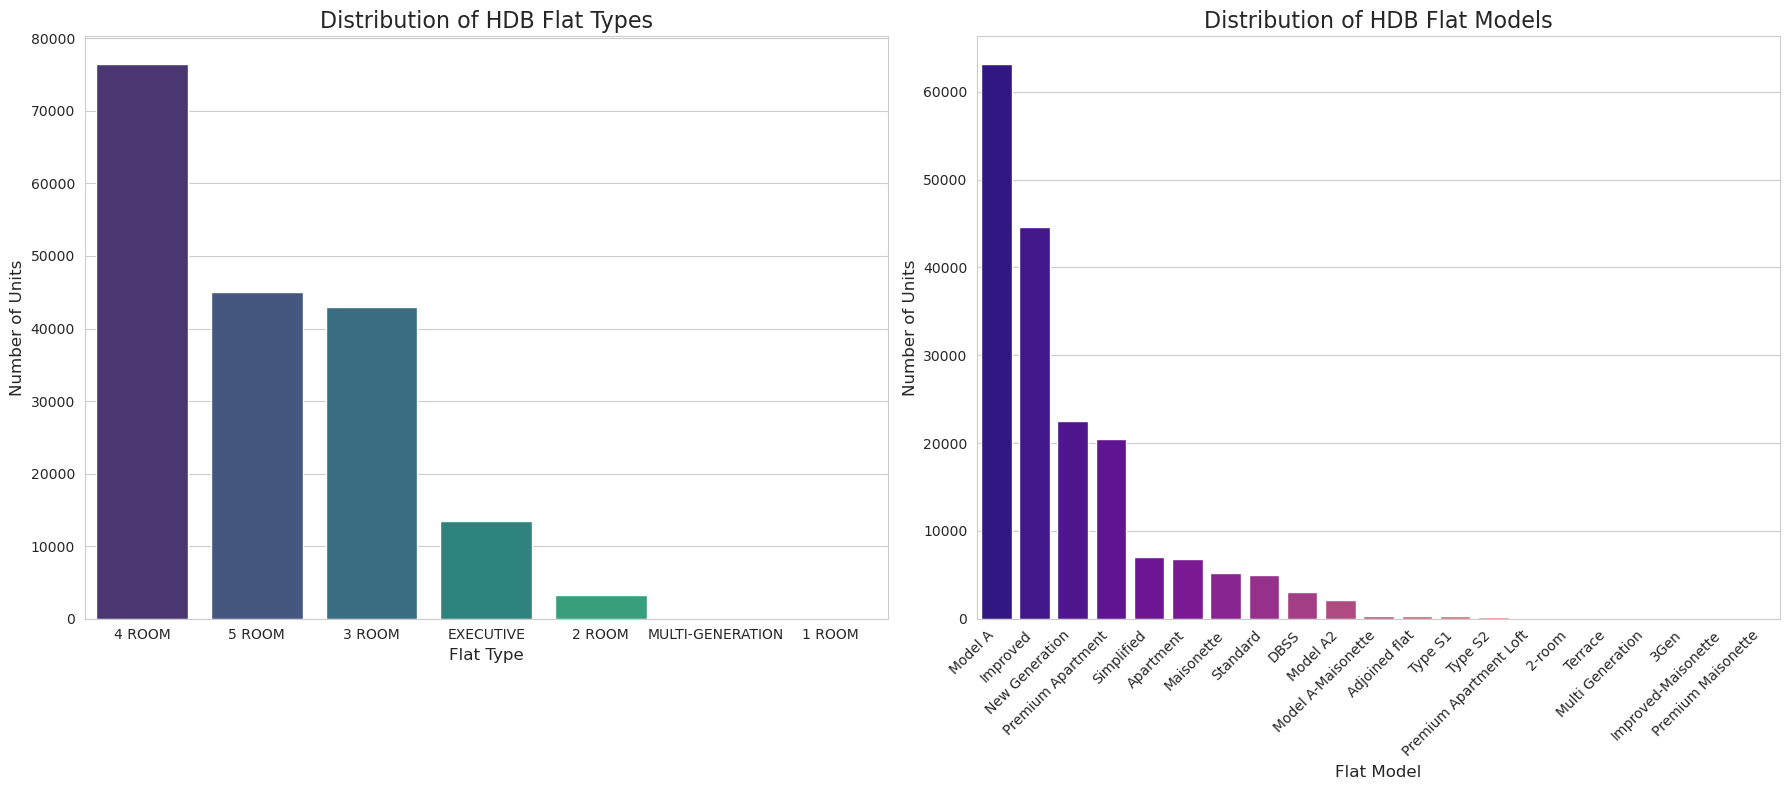

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Set plot style ---
sns.set_style("whitegrid")
plt.figure(figsize=(18, 8))


# --- 1. Visualization for flat_type ---
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
flat_type_plot = sns.countplot(x='flat_type', data=df, palette='viridis', order = df['flat_type'].value_counts().index)
flat_type_plot.set_title('Distribution of HDB Flat Types', fontsize=16)
flat_type_plot.set_xlabel('Flat Type', fontsize=12)
flat_type_plot.set_ylabel('Number of Units', fontsize=12)


# --- 2. Visualization for flat_model ---
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
flat_model_plot = sns.countplot(x='flat_model', data=df, palette='plasma', order = df['flat_model'].value_counts().index)
flat_model_plot.set_title('Distribution of HDB Flat Models', fontsize=16)
flat_model_plot.set_xlabel('Flat Model', fontsize=12)
flat_model_plot.set_ylabel('Number of Units', fontsize=12)
# Rotate labels to prevent them from overlapping
plt.xticks(rotation=45, ha='right')


# --- Display the plots ---
plt.tight_layout() # Adjusts plot parameters for a tight layout
plt.show()

In [5]:
print(df['flat_type'].value_counts())

flat_type
4 ROOM              76457
5 ROOM              45059
3 ROOM              42908
EXECUTIVE           13474
2 ROOM               3218
MULTI-GENERATION       78
1 ROOM                 68
Name: count, dtype: int64


In [6]:
print(df['flat_model'].value_counts())

flat_model
Model A                   63164
Improved                  44622
New Generation            22514
Premium Apartment         20466
Simplified                 6968
Apartment                  6757
Maisonette                 5148
Standard                   4960
DBSS                       3031
Model A2                   2078
Model A-Maisonette          325
Adjoined flat               317
Type S1                     299
Type S2                     162
Premium Apartment Loft      103
2-room                      100
Terrace                      98
Multi Generation             78
3Gen                         32
Improved-Maisonette          26
Premium Maisonette           14
Name: count, dtype: int64


In [ ]:
# --- Create the box plot ---
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Boxplot shows the quartiles and outliers
sns.boxplot(x=df['floor_area_sqm'], palette='viridis')

# Swarmplot overlays the individual data points (useful for seeing density)
sns.swarmplot(x=df['floor_area_sqm'], color="black", alpha=0.5, size=3)

plt.title('Distribution of Floor Area (sqm)', fontsize=16)
plt.xlabel('Floor Area (sqm)', fontsize=12)
plt.show()

/tmp/ipykernel_5379/2302344539.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['floor_area_sqm'], palette='viridis')


In [2]:
# Convert 'month' column to datetime objects
df['month_dt'] = pd.to_datetime(df['month'], format='%Y-%m')

# Define the valid date range
start_date = pd.to_datetime('2017-01-01')
end_date = pd.to_datetime('2024-12-31')

# Find rows with dates outside the valid range
out_of_range_dates = df[(df['month_dt'] < start_date) | (df['month_dt'] > end_date)]

# --- Print the results ---
if out_of_range_dates.empty:
    print("All dates are within the 2017-2024 range.")
else:
    print("Found the following dates outside the 2017-2024 range:")
    print(out_of_range_dates[['month']])

# Clean up the temporary datetime column
df.drop(columns=['month_dt'], inplace=True, errors='ignore')

All dates are within the 2017-2024 range.


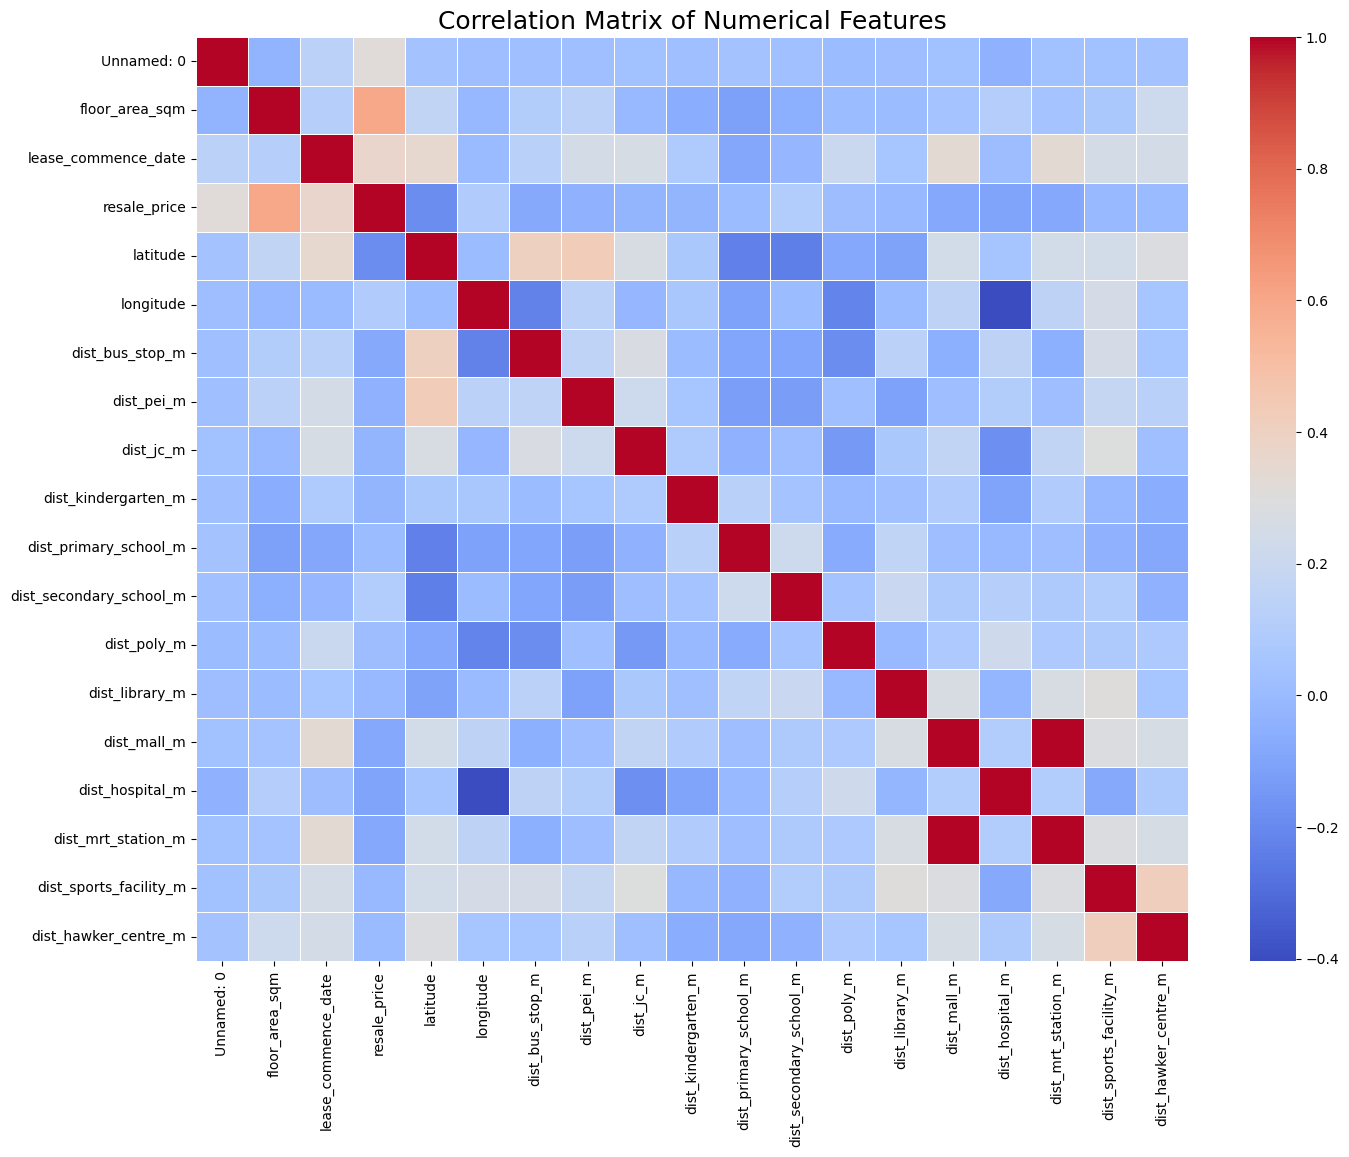

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Select only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap
sns.heatmap(
    corr_matrix,
    annot=False,  # Set to True if you have few features and want to see the numbers
    cmap='coolwarm', # Use a diverging palette
    linewidths=.5
)

plt.title('Correlation Matrix of Numerical Features', fontsize=18)
plt.show()